In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.drop(columns=['ID'])

# Overview

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EC        3017 non-null   float64
 1   OM        3019 non-null   float64
 2   BD        3016 non-null   float64
 3   P         2903 non-null   float64
 4   SAND      3021 non-null   float64
 5   SILT      3021 non-null   float64
 6   CLAY      3021 non-null   float64
 7   N         3014 non-null   float64
 8   K         3008 non-null   float64
 9   Ca        3009 non-null   float64
 10  Mg        3008 non-null   float64
 11  Na        3008 non-null   float64
 12  CEC       3009 non-null   float64
 13  SAR       3008 non-null   float64
 14  ESP       3008 non-null   float64
 15  Class.pH  3012 non-null   object 
dtypes: float64(15), object(1)
memory usage: 377.9+ KB


In [4]:
train.head()

,EC,OM,BD,P,SAND,SILT,CLAY,N,K,Ca,Mg,Na,CEC,SAR,ESP,Class.pH
0,1.4,2.4,1.4,21.0,65.5,16.7,17.8,0.0,0.4,3.1,2.9,0.4,8.9,0.1,0.0,Moderately acidic
1,0.4,1.3,1.3,10.5,18.2,30.0,51.8,0.1,2.1,54.1,3.4,5.9,40.7,0.2,0.1,Strongly alkaline
2,1.1,1.2,1.4,6.3,26.2,20.2,21.8,0.1,2.3,23.8,3.6,0.3,18.9,0.0,0.0,Moderately alkaline
3,0.4,3.2,1.3,4.2,32.9,26.0,41.1,0.1,1.8,91.5,10.6,0.2,36.3,0.0,0.0,Moderately alkaline
4,0.9,1.2,1.7,5.2,64.2,22.7,13.1,0.1,0.9,5.9,3.0,0.2,9.9,0.1,0.0,Moderately acidic


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
EC,3017.0,1.109195,3.324244,0.0,0.3,0.40,0.80,65.40
OM,3019.0,3.124008,3.643582,0.1,1.5,2.30,3.60,37.90
BD,3016.0,2.213316,5.015036,0.5,1.3,1.30,1.40,31.12
P,2903.0,22.845532,40.721598,0.0,5.2,12.10,26.45,857.10
SAND,3021.0,37.125654,19.183357,0.8,21.5,34.90,51.50,100.00
SILT,3021.0,22.062469,10.304526,1.1,15.1,21.30,28.00,69.30
CLAY,3021.0,36.831314,16.862349,0.0,23.1,34.70,49.80,83.20
N,3014.0,0.502741,3.351938,0.0,0.1,0.10,0.10,31.12
K,3008.0,2.994927,7.071810,0.0,0.6,1.10,1.80,31.12
Ca,3009.0,21.056677,20.777854,0.0,4.9,15.00,32.30,326.40


In [6]:
print(train['Class.pH'].value_counts())

target_map = {
    "Strongly acidic": -2,
    "Moderately acidic": -1,
    "Neutral": 0,
    "Moderately alkaline": 1,
    "Strongly alkaline": 2
}

train['Class.pH'] = train['Class.pH'].map(target_map)
train['Class.pH'].value_counts()

Class.pH
Moderately alkaline    1290
Moderately acidic       776
Neutral                 438
Strongly alkaline       293
Strongly acidic         215
Name: count, dtype: int64


Class.pH
 1.0    1290
-1.0     776
 0.0     438
 2.0     293
-2.0     215
Name: count, dtype: int64

/home/alfi/miniforge3/lib/python3.13/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


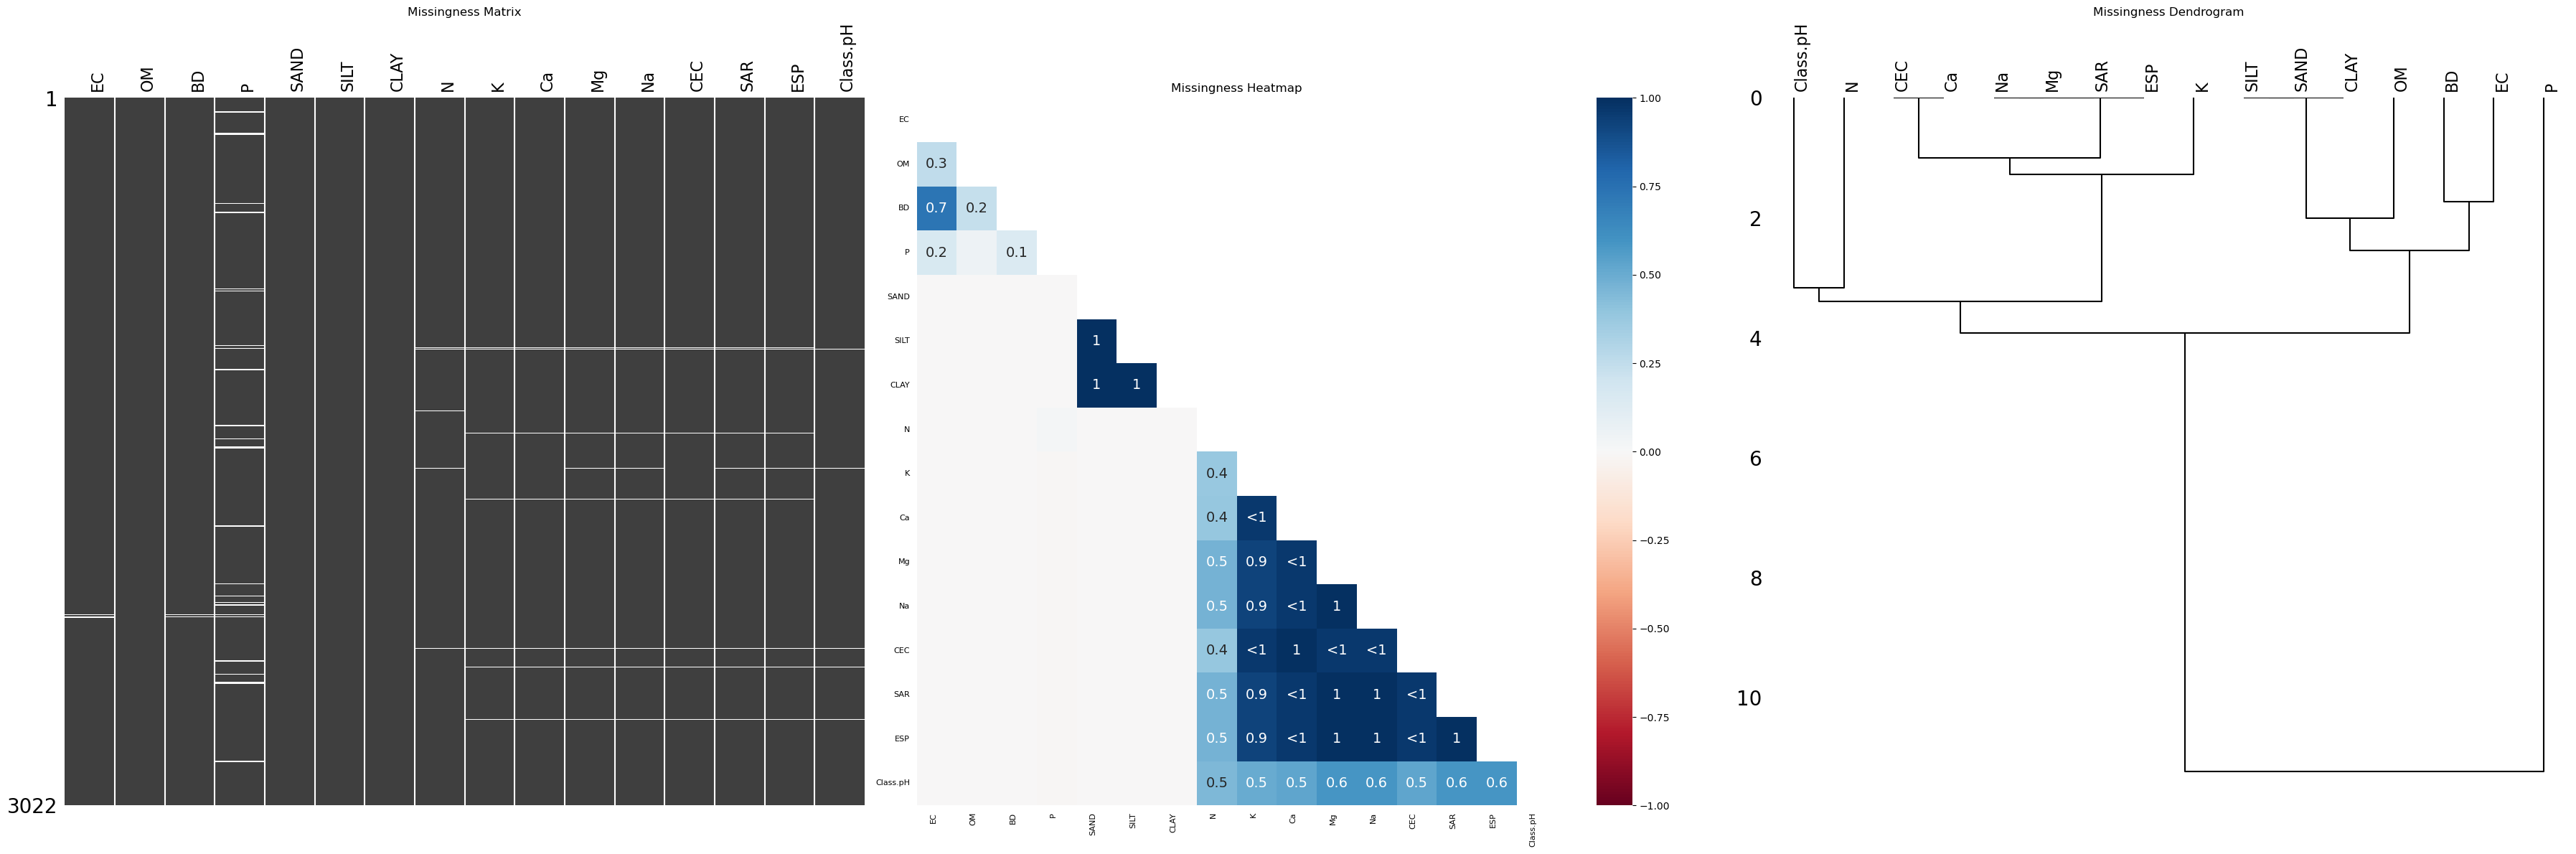

,P,Na,Mg,ESP,SAR,K,Ca,CEC,Class.pH,N,BD,EC,OM,CLAY,SAND,SILT
Feature,P,Na,Mg,ESP,SAR,K,Ca,CEC,Class.pH,N,BD,EC,OM,CLAY,SAND,SILT
Train_Missing,119,14,14,14,14,14,13,13,10,8,6,5,3,1,1,1
Train_Missing_Ratio,0.0394,0.0046,0.0046,0.0046,0.0046,0.0046,0.0043,0.0043,0.0033,0.0026,0.002,0.0017,0.001,0.0003,0.0003,0.0003


In [7]:
def missingness(df):
    # Create a 1x3 subplot
    fig, axes = plt.subplots(1, 3, figsize=(36, 12))


    # Visualize missingness patterns
    msno.matrix(df, ax=axes[0])
    axes[0].set_title('Missingness Matrix')
    axes[0].tick_params(axis="x", rotation=90)

    # Heatmap of correlations in missingness
    msno.heatmap(df, ax=axes[1])
    axes[1].set_title('Missingness Heatmap')
    axes[1].tick_params(axis="x", rotation=90, labelsize=8)
    axes[1].tick_params(axis="y", rotation=0, labelsize=8)

    # Dendrogram of missingness clusters
    msno.dendrogram(df, ax=axes[2])
    axes[2].set_title('Missingness Dendrogram')
    axes[2].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()

# Create a summary dataframe of missing values for both train and test datasets
missing_summary = pd.DataFrame({
    'Feature': train.columns,
    'Train_Missing': train.isnull().sum(),
})

# Calculate missing percentages
missing_summary['Train_Missing_Ratio'] = (missing_summary['Train_Missing'] / len(train)).round(4)

# Sort by train missing count descending
missing_summary = missing_summary.sort_values('Train_Missing', ascending=False)

missingness(train)

missing_summary.T

## Missingness Analysis

This section examines the extent and structure of missing values in the dataset using matrix plots, heatmaps, and hierarchical clustering.

---

### Extent of Missing Data

- Overall missingness is very low across all features.  
- The highest proportion of missing values is found in **Phosphorus (P)**, with 119 missing cases (~3.9%).  
- Most other variables have fewer than 15 missing cases (<0.5%).  
- Soil texture variables (**SAND, SILT, CLAY**) and organic matter (**OM**) have almost complete data, with only one or two missing entries.

---

### Patterns of Missingness

- **Correlated Missingness:**  
  Certain groups of variables tend to be missing together:
  - **Na, Mg, ESP, SAR, K, Ca, CEC, Class.pH** form a cluster with moderate pairwise correlations in missingness.
  - **SAND, SILT, CLAY, OM, EC, BD, P** form another branch with fewer missing entries.
- **Heatmap Evidence:**  
  The heatmap shows strong pairwise associations in missingness between chemically related variables (e.g., ESP–SAR, Na–Mg).  
  Texture variables (SAND, SILT, CLAY) also cluster together.

---

### Classification of Missingness Mechanism

- **Not MCAR:** Missingness is not completely random, as clear structured clusters are observed.  
- **Not MNAR:** There is no evidence that missingness depends directly on the unobserved values themselves (e.g., high values being systematically missing).  
- **Predominantly MAR:** Missingness is best explained as **Missing At Random (MAR)**, where missingness in one variable is conditional on other observed variables.  
  For example, missing ESP values often coincide with missing SAR and Na, consistent with laboratory testing practices.

---

### Practical Implications

1. **Minimal Impact:** The overall percentage of missing data is very low; simple imputation will not introduce substantial bias.  
2. **Cluster-Aware Imputation:** Because missingness is structured:
   - For chemical clusters (Na, Mg, ESP, SAR, Ca, CEC, Class.pH), use **multivariate imputation** (e.g., MICE, KNN imputer) to preserve inter-variable relationships.  
   - For isolated features with very low missingness (e.g., P, OM), simple imputation (mean or median) is sufficient.  
3. **Model Compatibility:** Assuming MAR is valid, downstream models can safely use imputed data without concern for systematic bias from MNAR patterns.

---

### Summary

The dataset exhibits **low overall missingness** with **structured, MAR-type patterns**. Chemical properties tend to be missing together, while soil texture variables are largely complete. This structure supports the use of simple imputation for isolated features and multivariate methods for correlated groups.


In [8]:
# Reverse the mapping
reverse_map = {v: k for k, v in target_map.items()}

# Apply to your column
train['Class.pH'] = train['Class.pH'].map(reverse_map)

# Verify
print(train['Class.pH'].value_counts())

Class.pH
Moderately alkaline    1290
Moderately acidic       776
Neutral                 438
Strongly alkaline       293
Strongly acidic         215
Name: count, dtype: int64


# Data Distribution

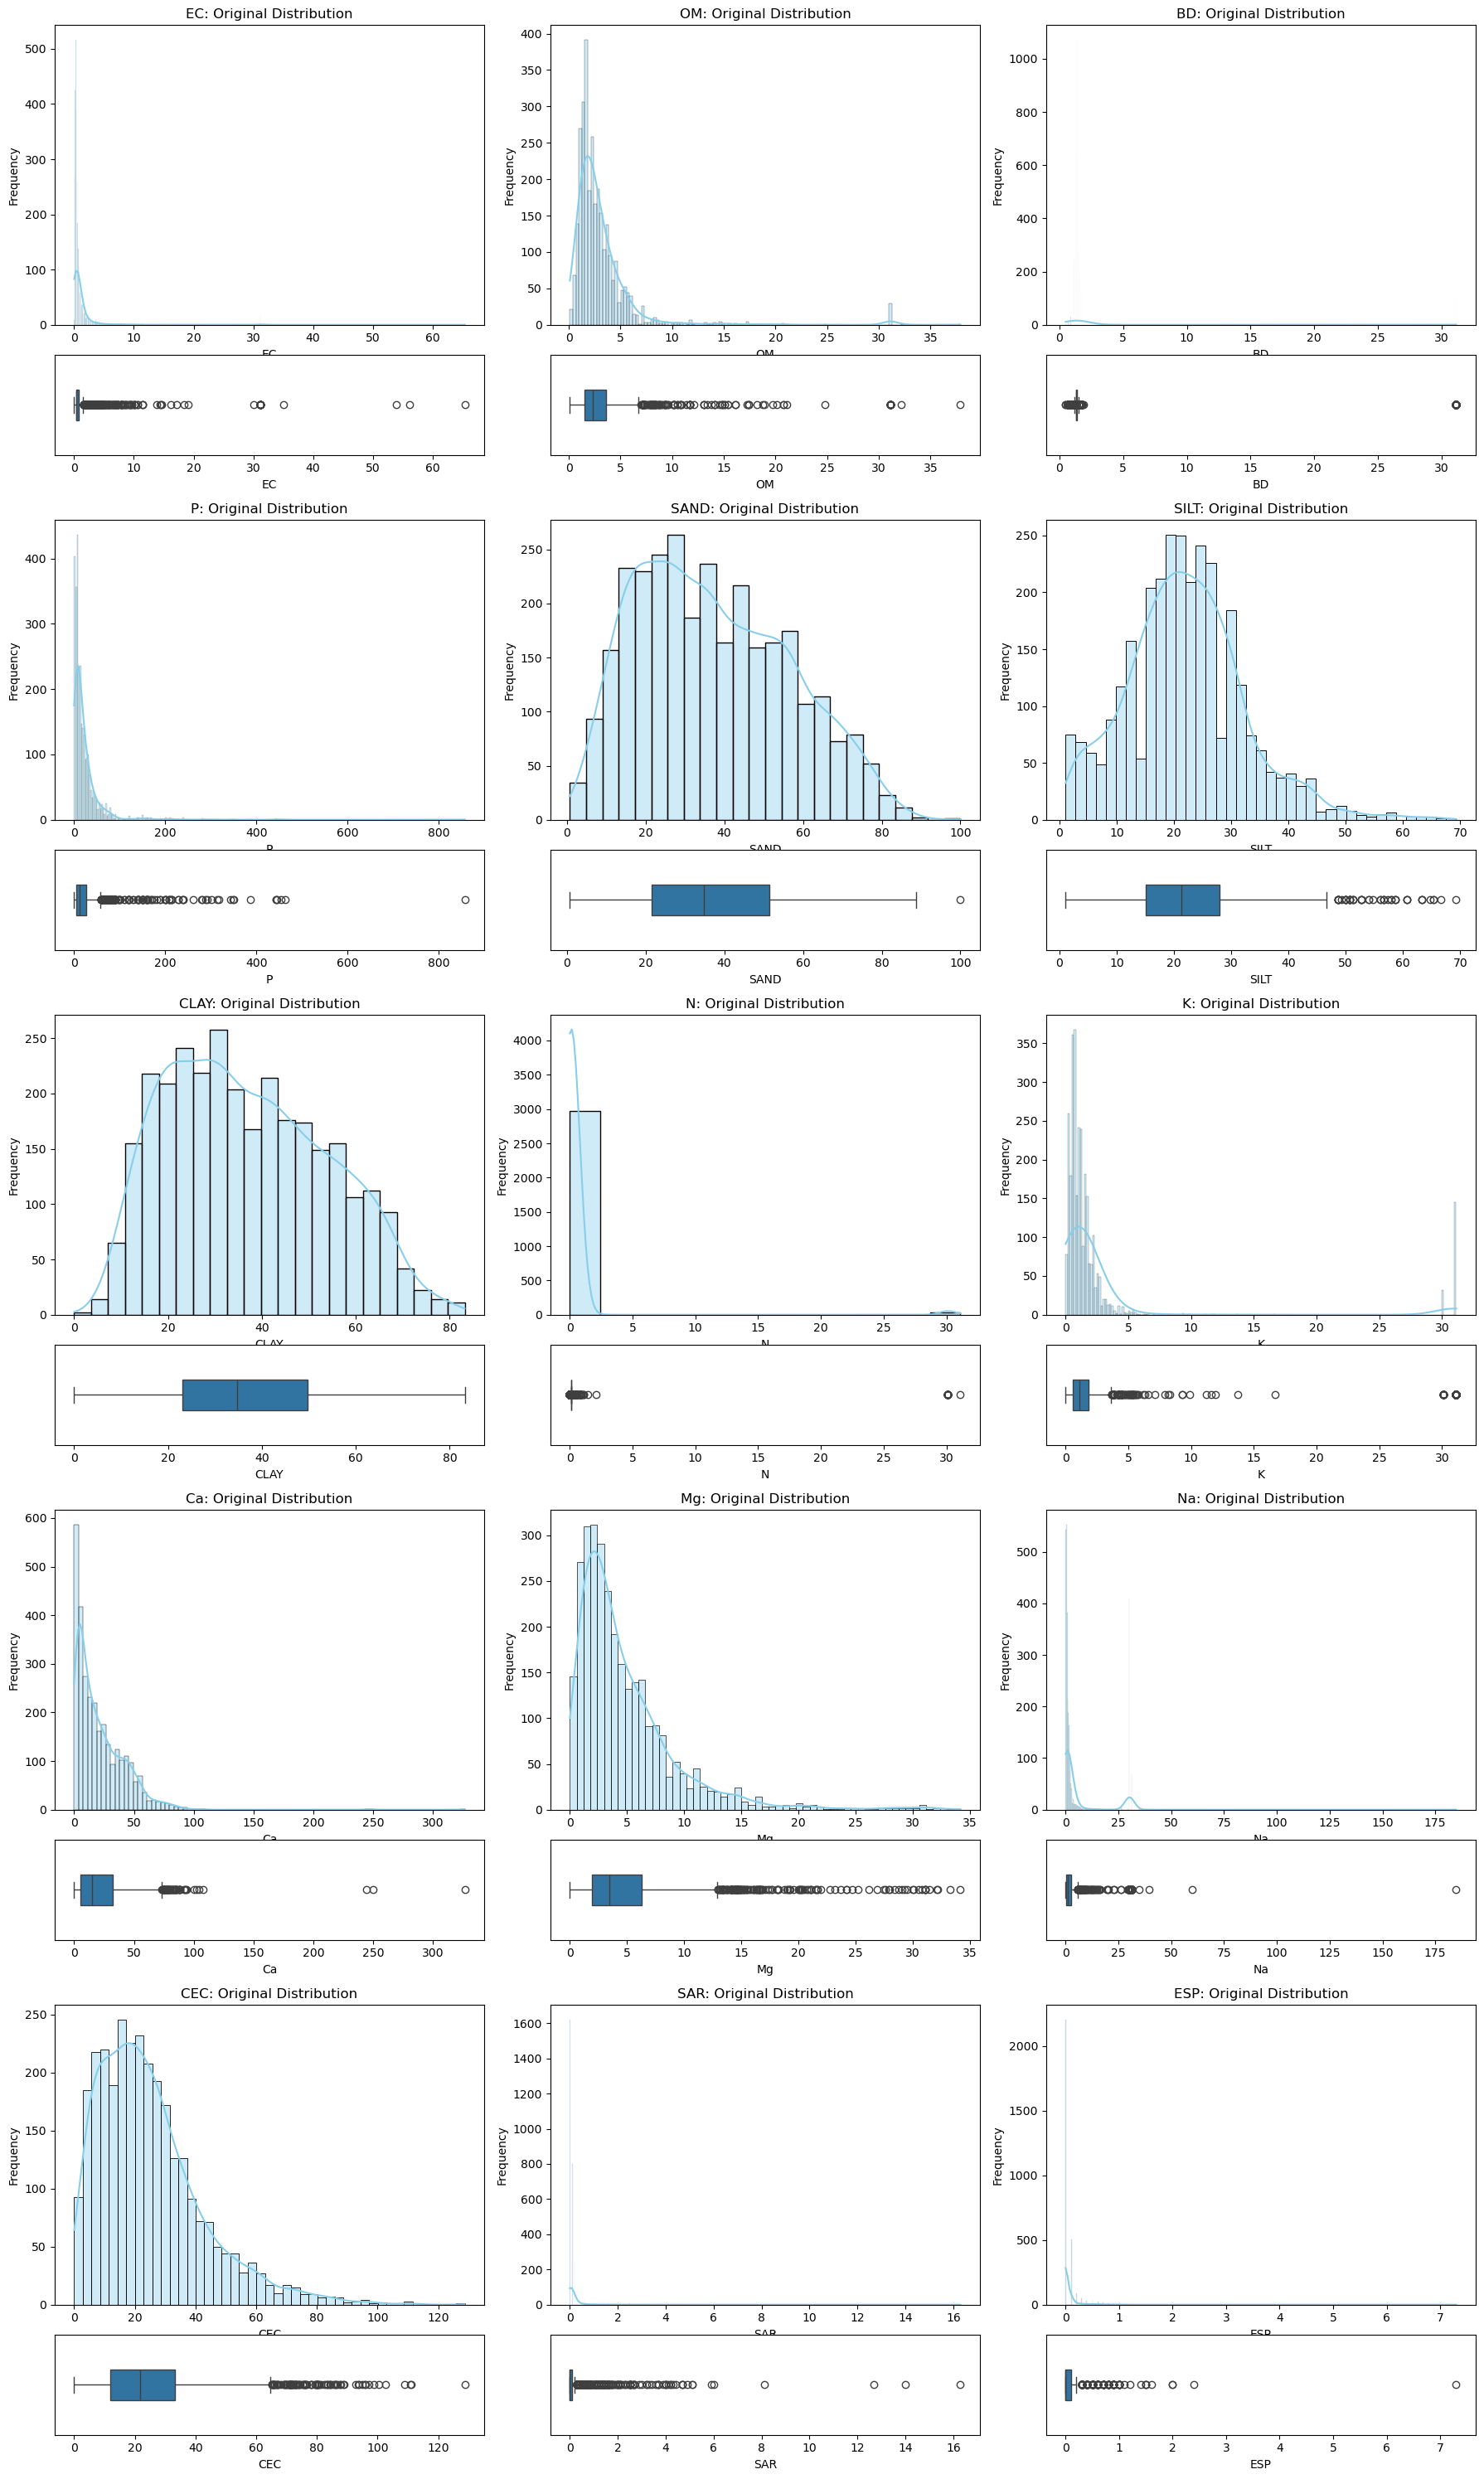

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def kde_box_stacked(df, cols, title):
    ncols = 3
    nrows = (len(cols) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 6))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        # get the gridspec for this slot and subdivide it into 2 rows
        inner_gs = axes[i].get_subplotspec().subgridspec(2, 1, height_ratios=[3, 1])
        axes[i].remove()  # remove placeholder axis

        ax_kde = fig.add_subplot(inner_gs[0])
        ax_box = fig.add_subplot(inner_gs[1], sharex=ax_kde)

        sns.histplot(df[col].dropna(), kde=True, ax=ax_kde, color="skyblue", alpha=0.4)
        ax_kde.set_title(f"{col}: {title}")
        ax_kde.set_ylabel("Frequency")

        sns.boxplot(x=df[col], ax=ax_box, width=0.3)
        ax_box.set_yticks([])
        ax_box.set_ylabel("")

    # remove any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
kde_box_stacked(train, numeric_cols, "Original Distribution")

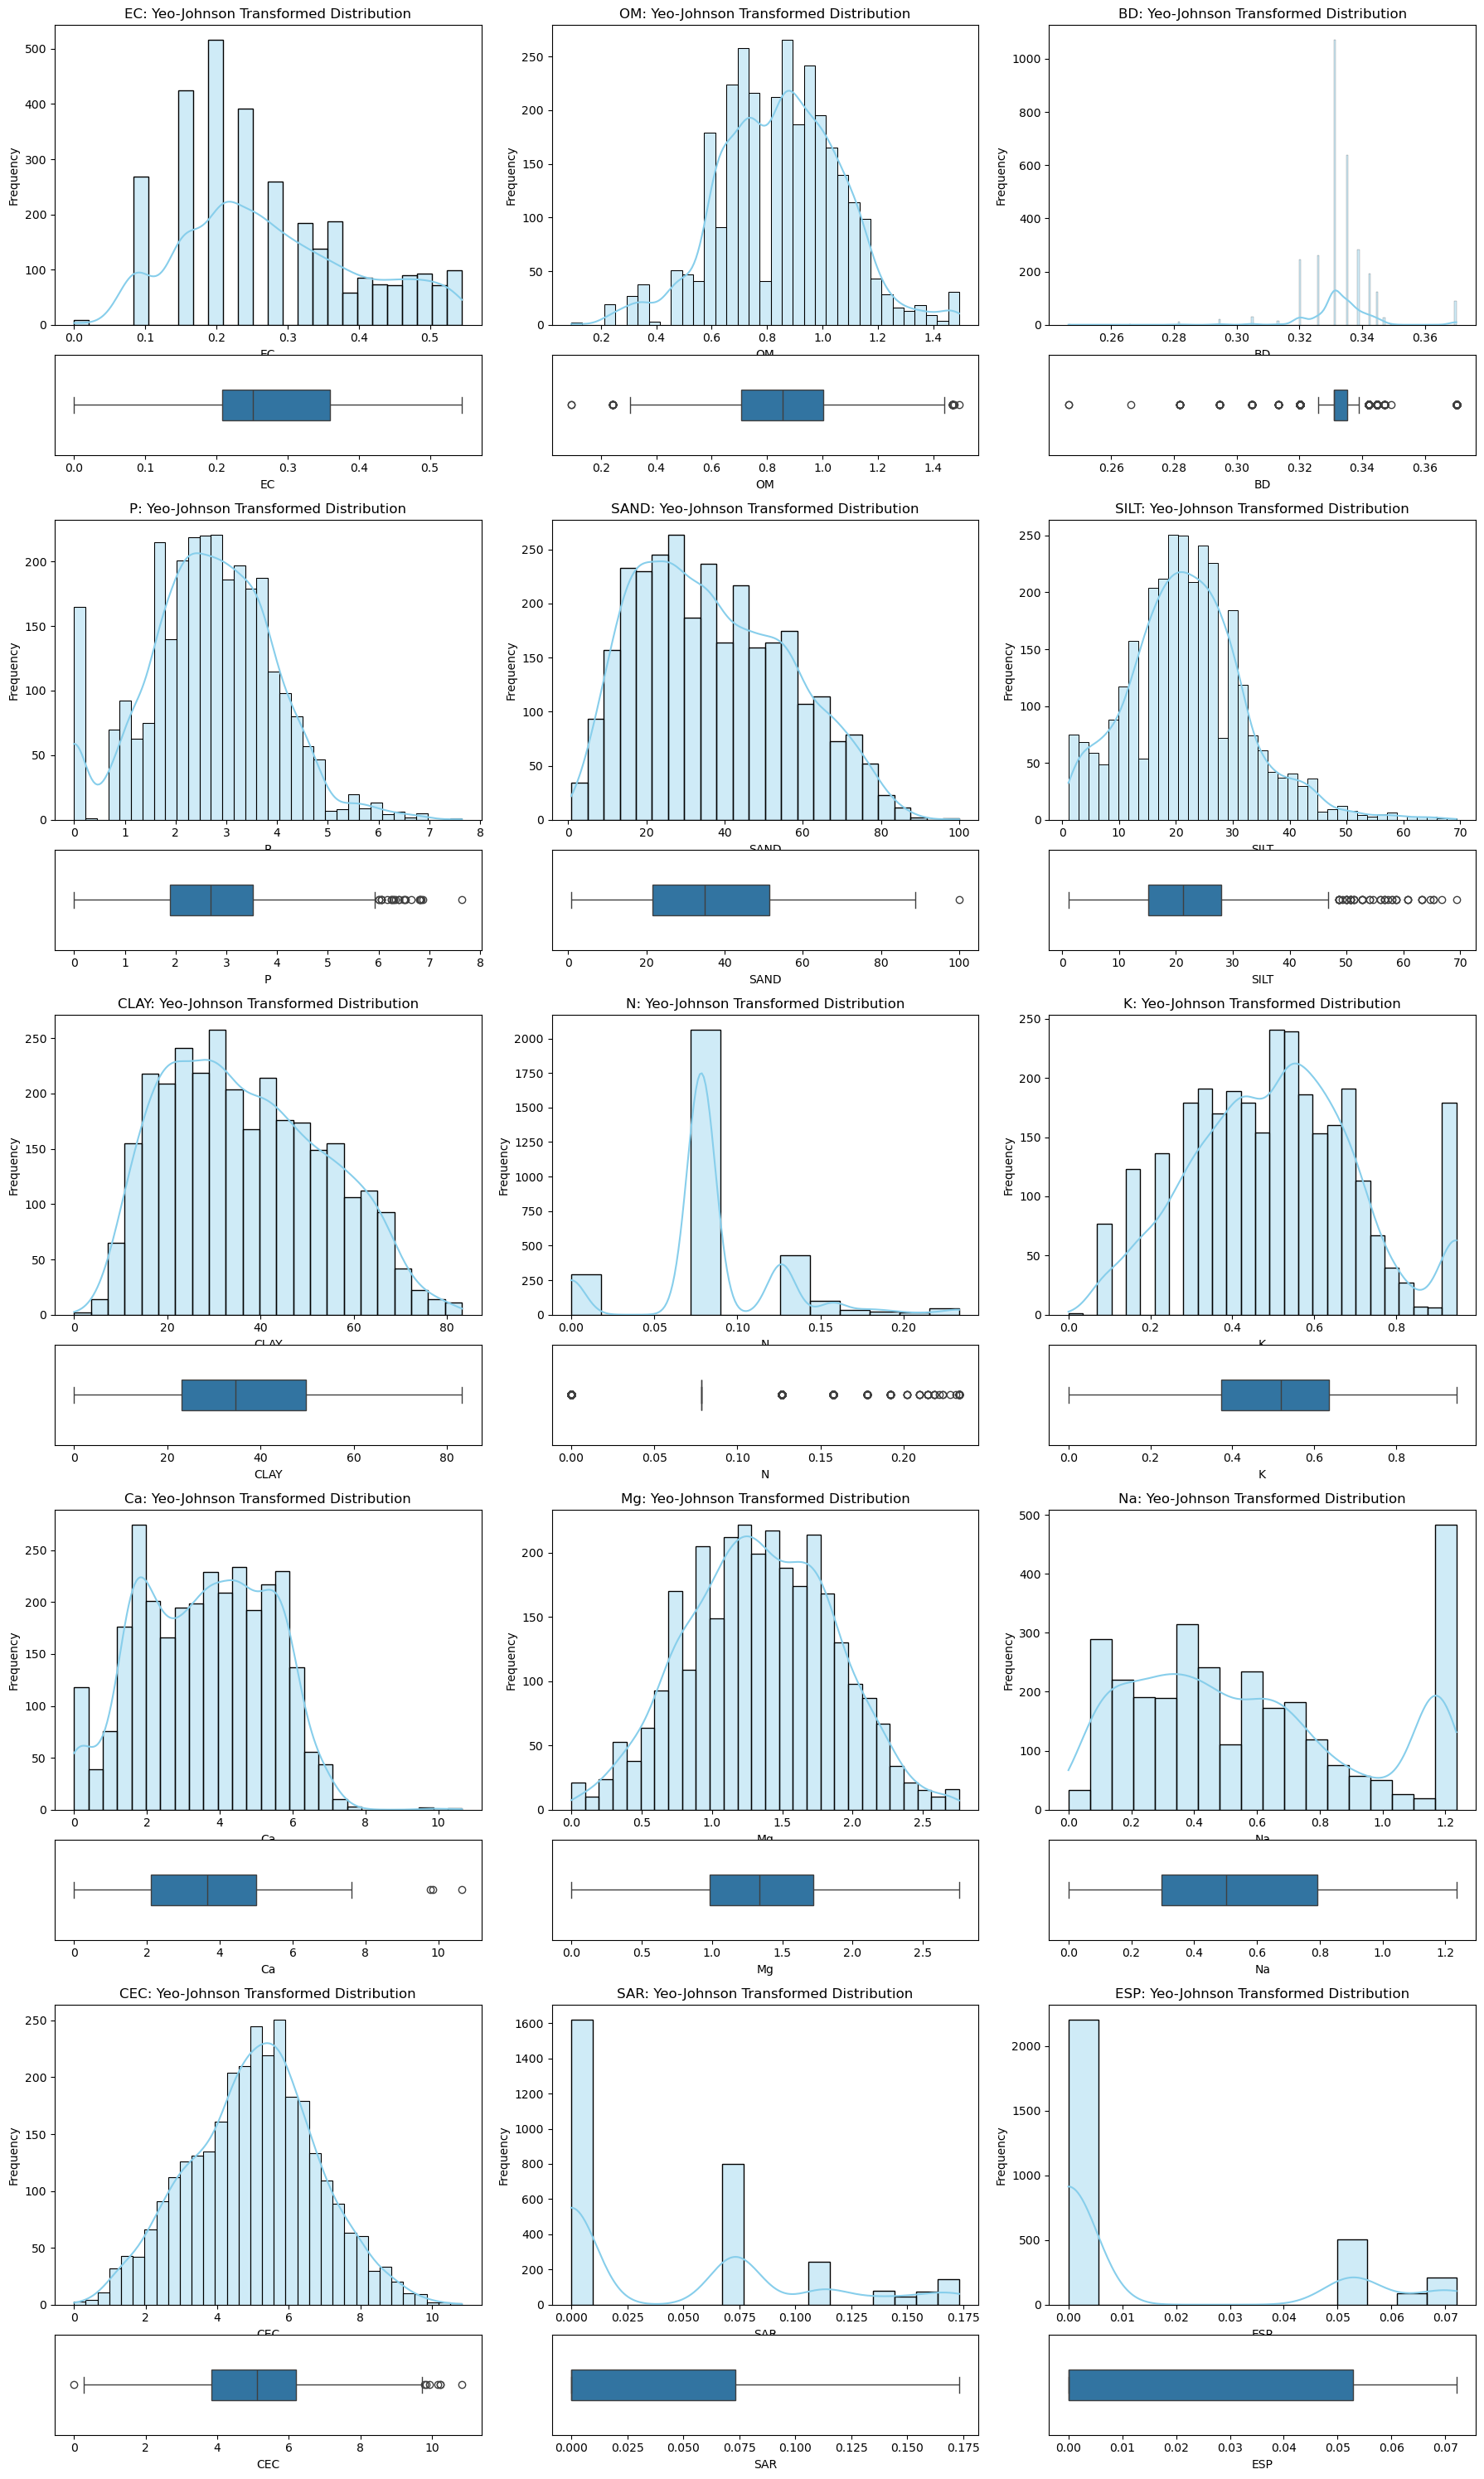

In [10]:
# log1p transform skewed features
import numpy as np
from sklearn.preprocessing import PowerTransformer

skewed_cols = ["EC","OM","BD","P","N","K","Ca","Mg","Na","CEC","SAR","ESP"]

train_yeojohnson = train.copy()
pt = PowerTransformer(method='yeo-johnson', standardize=False)
train_yeojohnson[skewed_cols] = pt.fit_transform(train[skewed_cols])

kde_box_stacked(train_yeojohnson, numeric_cols, "Yeo-Johnson Transformed Distribution")

## Distribution Analysis and Transformation

This section compares the original feature distributions against their Yeo-Johnson transformed versions.  
The aim of applying the Yeo-Johnson transformation was to reduce skewness, approximate normality, and stabilize variance.

---

### Observations from Original Distributions

- **Highly Skewed Features:**  
  Many chemical and nutrient variables (**EC, OM, BD, P, N, K, Ca, Mg, Na, SAR, ESP, CEC**) show strong positive skew with long tails and numerous outliers.  
  - Example: **P (Phosphorus)** exhibits extreme outliers above 600.  
  - **EC, Ca, Na, SAR, ESP** are heavily right-skewed with concentrated low values and long high-value tails.  

- **Soil Texture Variables (SAND, SILT, CLAY):**  
  These already show approximately symmetric or uniform-like distributions.  
  - **SAND** and **CLAY** are near-uniform.  
  - **SILT** appears close to a bell shape.  
  Transformations may not be necessary here.

- **Boxplots Confirm Outliers:**  
  Nearly all nutrient features contain strong outliers in their raw form, visible in the upper whisker range.

---

### Impact of Yeo-Johnson Transformation

- **Reduction in Skewness:**  
  Features such as **EC, OM, P, Ca, Mg, Na, K, CEC** exhibit far more symmetric, bell-shaped distributions after transformation.  
  Boxplots confirm a reduced spread and fewer extreme outliers.

- **Normalization Effect:**  
  - **OM, Mg, CEC** approach near-normal distributions with balanced tails.  
  - **K, Ca** achieve unimodal distributions suitable for linear models.  

- **Features with Limited Effect:**  
  - **BD** shows minimal improvement; its values remain tightly concentrated with irregular spikes.  
  - **N, SAR, ESP** remain highly compressed near zero, with limited transformation effect due to their narrow value ranges.  

- **Soil Texture Variables:**  
  As expected, **SAND, SILT, CLAY** distributions remain largely unchanged. Their original structure already resembled normal-like or uniform distributions.

---

### Practical Implications

1. **Improved Modeling Compatibility:**  
   The Yeo-Johnson transformation successfully reduces skewness, making data more compatible with algorithms sensitive to normality (e.g., linear models, SVMs).

2. **Outlier Mitigation:**  
   Several extreme values, particularly in **P, Ca, Na**, are now closer to the main distribution body, reducing leverage effects.

3. **Exceptions:**  
   - **BD, N, SAR, ESP** may require additional preprocessing (e.g., log transform for extreme compression or Winsorization for outliers) as Yeo-Johnson alone is insufficient.  
   - Soil texture variables do not require transformation.

---

### Summary

The Yeo-Johnson transformation substantially improved distributional properties for most chemical features, reducing skewness and outlier influence. Soil texture variables remain unchanged, which is appropriate given their original structure. A small subset of features (BD, N, SAR, ESP) may require targeted preprocessing beyond Yeo-Johnson to achieve fully normalized distributions.


# Feature Correlation and Multicollinearity

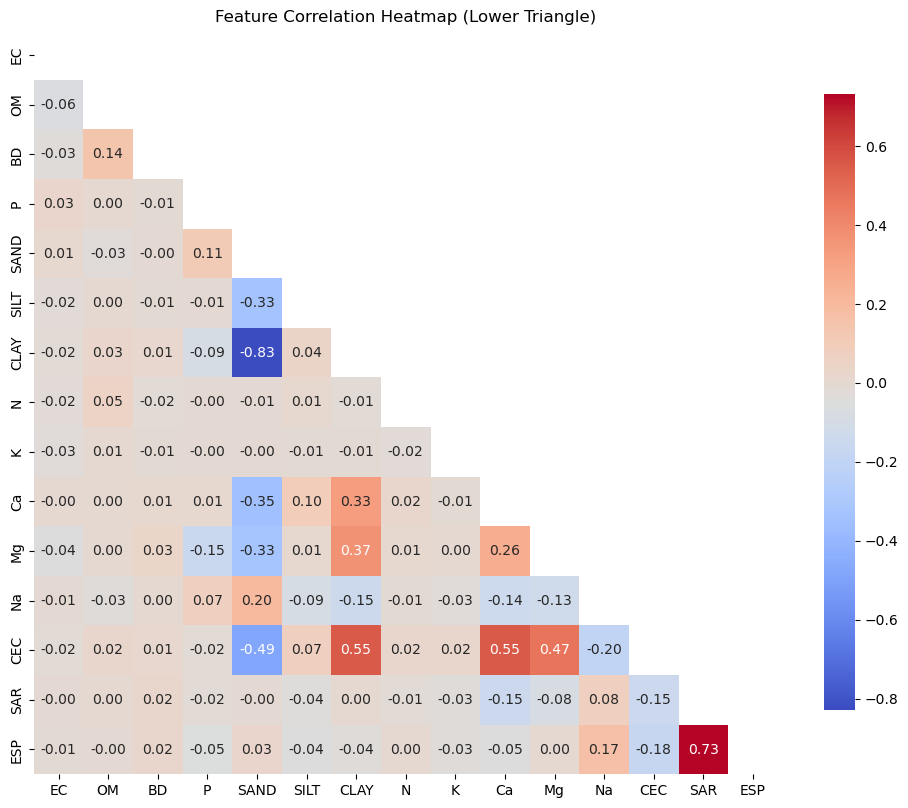

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = train[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Heatmap (Lower Triangle)")
plt.show()


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

no_nan = train[numeric_cols].dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(no_nan.values, i) for i in range(len(numeric_cols))]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

   Feature       VIF
6     CLAY  6.955061
12     CEC  6.588899
5     SILT  4.312720
9       Ca  3.031654
10      Mg  2.973700
4     SAND  2.935076
14     ESP  2.582095
13     SAR  2.456757
1       OM  1.760201
11      Na  1.398571
3        P  1.376374
2       BD  1.220950
8        K  1.178356
0       EC  1.113865
7        N  1.029268


## Correlation and Multicollinearity Analysis

This section summarizes the relationships among soil features using the correlation matrix and assesses multicollinearity with Variance Inflation Factors (VIF).

---

### Correlation Structure

- **Soil Texture Components (SAND, SILT, CLAY):**
  - **CLAY–SILT:** Very strong negative correlation (-0.83), reflecting their compositional trade-off in soil texture.  
  - **CLAY–SAND:** Moderate negative correlation (-0.33).  
  - **SILT–SAND:** Weak negative correlation (-0.01).  
  This confirms expected physical constraints: higher clay or silt content generally reduces sand proportion.

- **Chemical Properties:**
  - **CEC (Cation Exchange Capacity):** Positively correlated with **CLAY (0.55)**, **SILT (0.47)**, and **Ca (0.55)**, consistent with soil mineral composition influencing cation retention.
  - **Ca–Mg:** Moderate positive correlation (0.26), reflecting their joint occurrence in soil mineral content.
  - **Na–ESP:** Strong correlation (0.73), as Exchangeable Sodium Percentage (ESP) is directly derived from sodium concentration.

- **Weak/No Correlations:**
  - Organic matter (**OM**) and nutrient variables like **N** and **K** show weak correlations (<0.1) with most other variables, suggesting they provide largely independent information.

---

### Multicollinearity (VIF Results)

- **High VIF Values (Potential Multicollinearity):**
  - **CLAY (6.96)** and **CEC (6.59):** Strong collinearity, consistent with their positive correlation.  
  - **SILT (4.31), Ca (3.03), Mg (2.97), SAND (2.94):** Moderate collinearity, reflecting soil texture and nutrient associations.

- **Moderate VIF Values:**
  - **ESP (2.58) and SAR (2.46):** Both related to sodium activity, showing expected collinearity.  

- **Low VIF Values (No Concern):**
  - **OM, Na, P, BD, K, EC, N** all have VIF < 2, indicating minimal collinearity.

---

### Implications

1. **Soil Texture and CEC:**  
   CLAY, SILT, SAND, and CEC are strongly interrelated. Including all of them in a regression-type model may inflate variance. Feature selection, dimensionality reduction (e.g., PCA), or domain-driven aggregation (e.g., using texture classes) could mitigate redundancy.

2. **Sodium-Related Features:**  
   Na, SAR, and ESP are strongly correlated, as expected. Models may not benefit from keeping all three; ESP or SAR could serve as proxies depending on the target variable.

3. **Stable Predictors:**  
   Features with low VIF (e.g., OM, N, K, P, BD, EC) contribute independent information and can be safely retained.

---

### Summary

- Strong multicollinearity exists among **soil texture variables (SAND, SILT, CLAY)** and **CEC**.  
- Sodium-related variables (**Na, SAR, ESP**) also exhibit strong dependence.  
- Other features remain largely independent.  
- For modeling, either reduce dimensionality in correlated groups or select representative features to improve interpretability and reduce redundancy.


# Feature vs Target

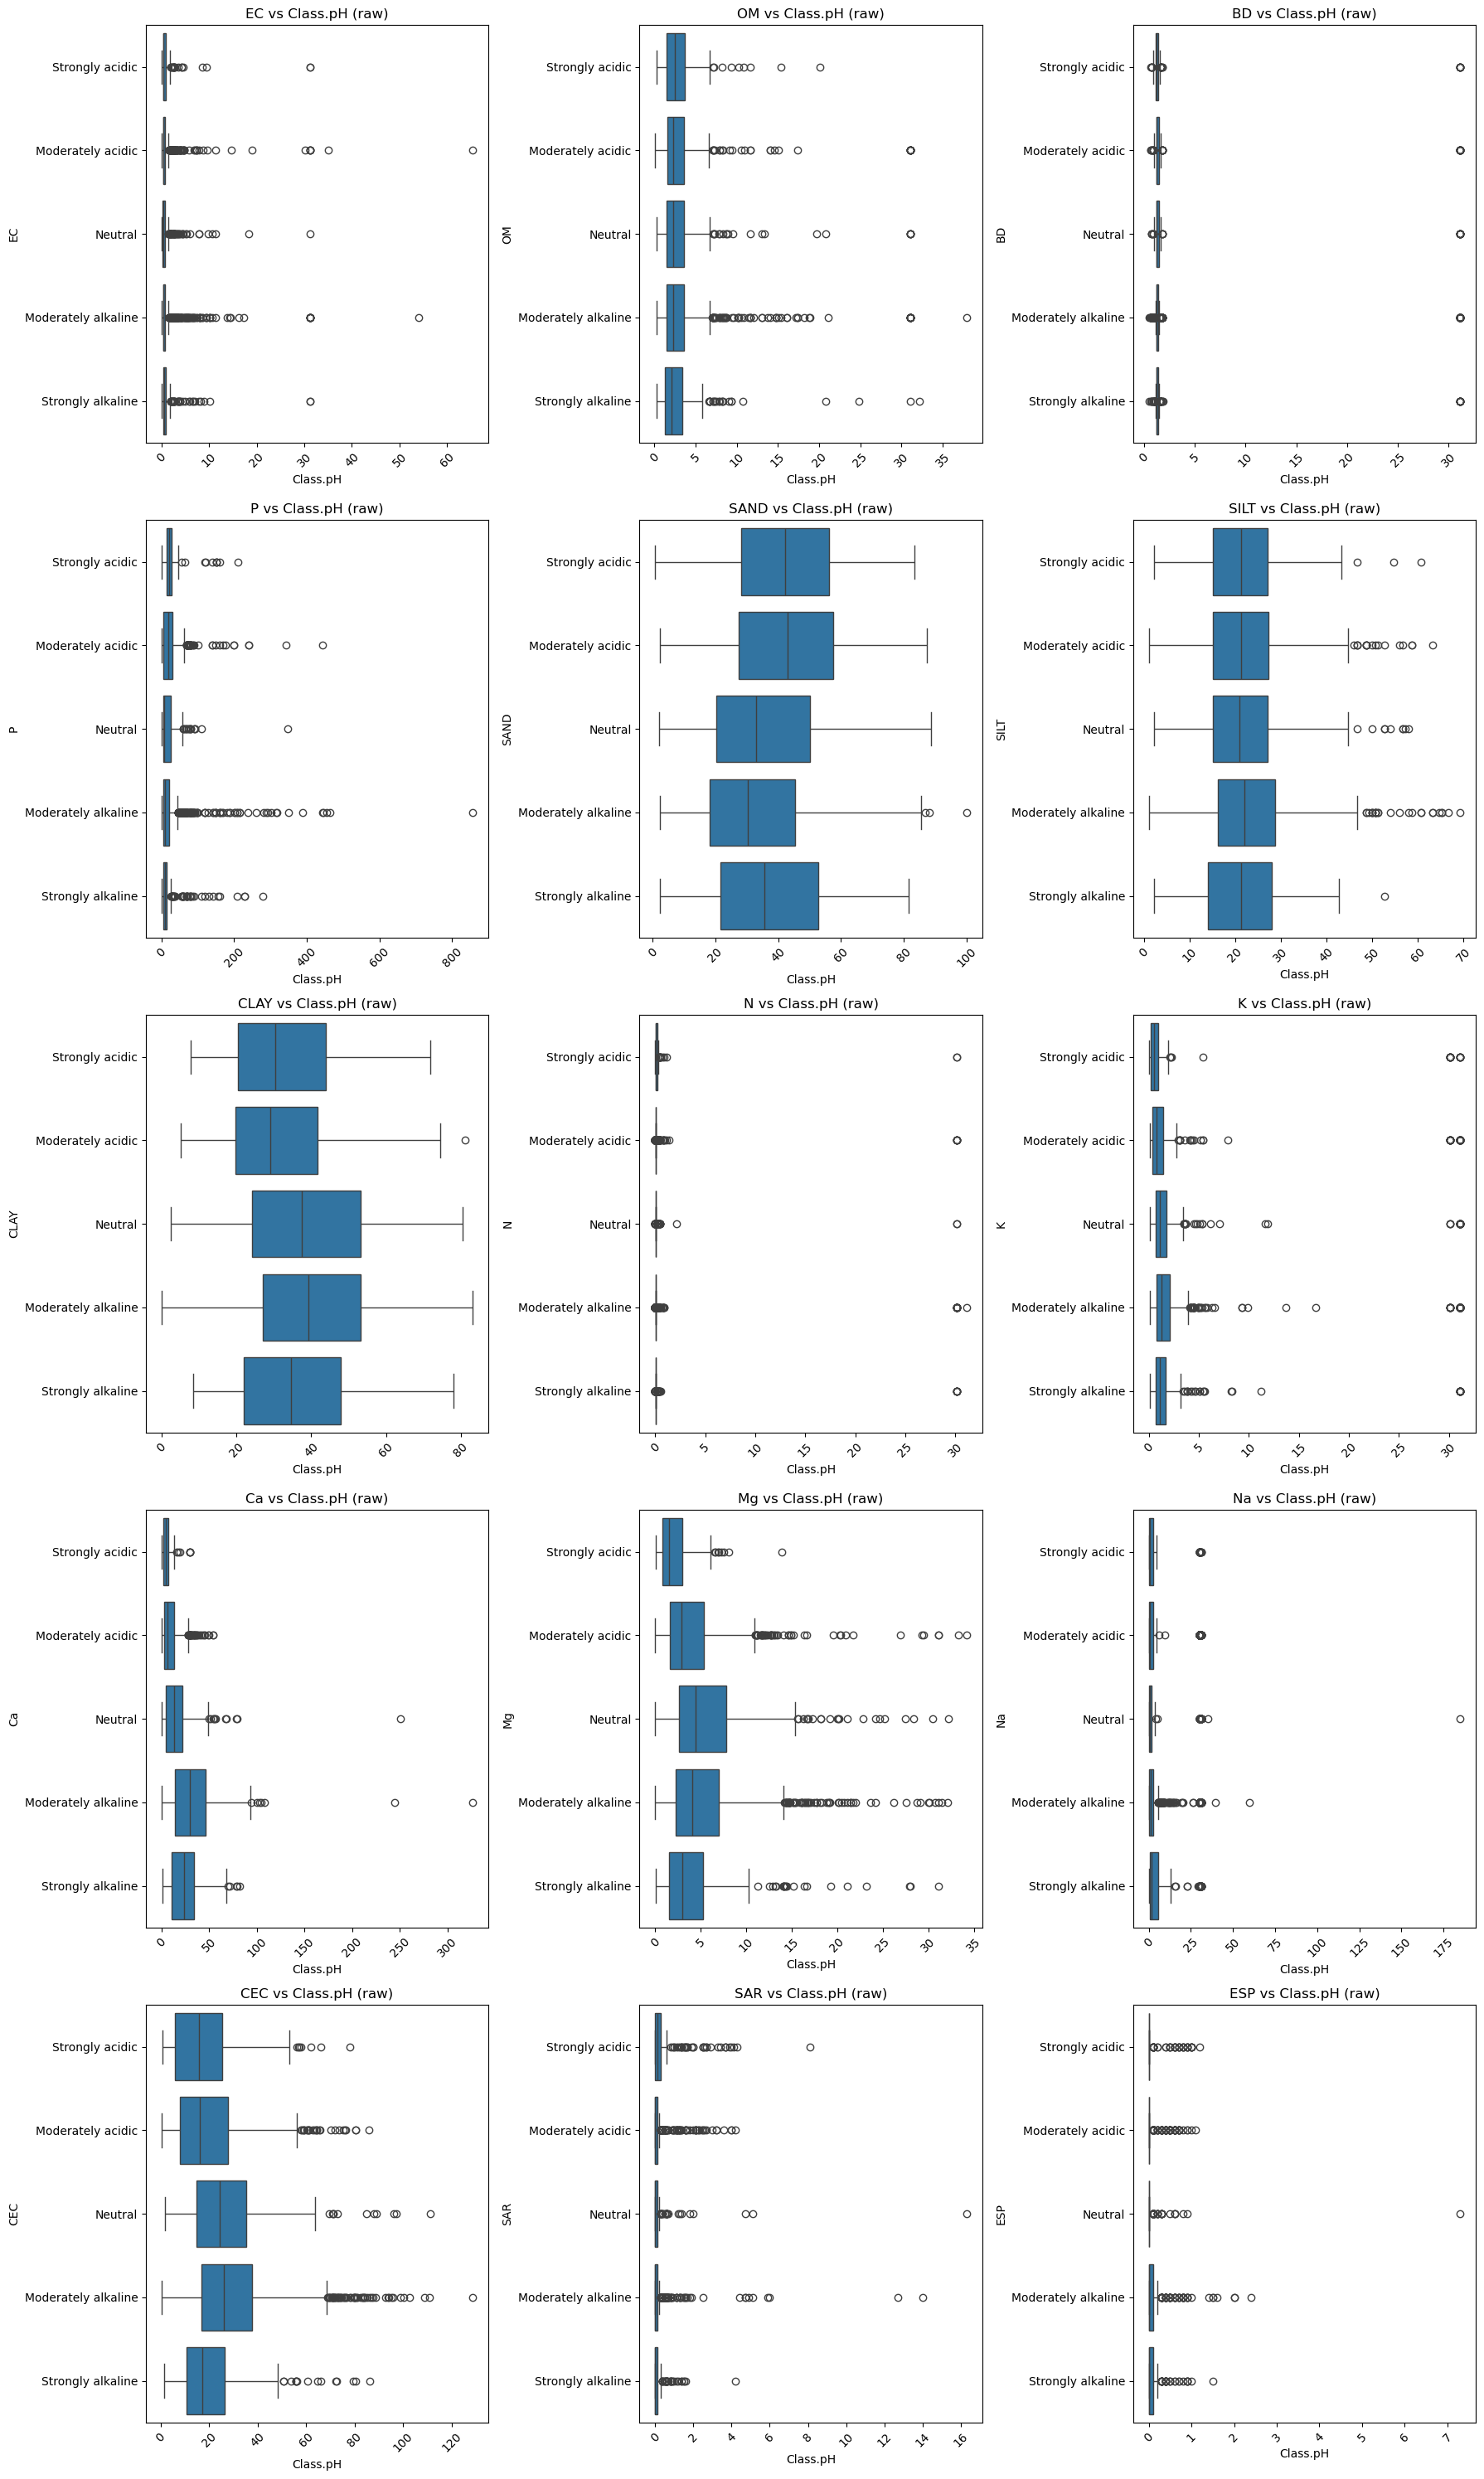

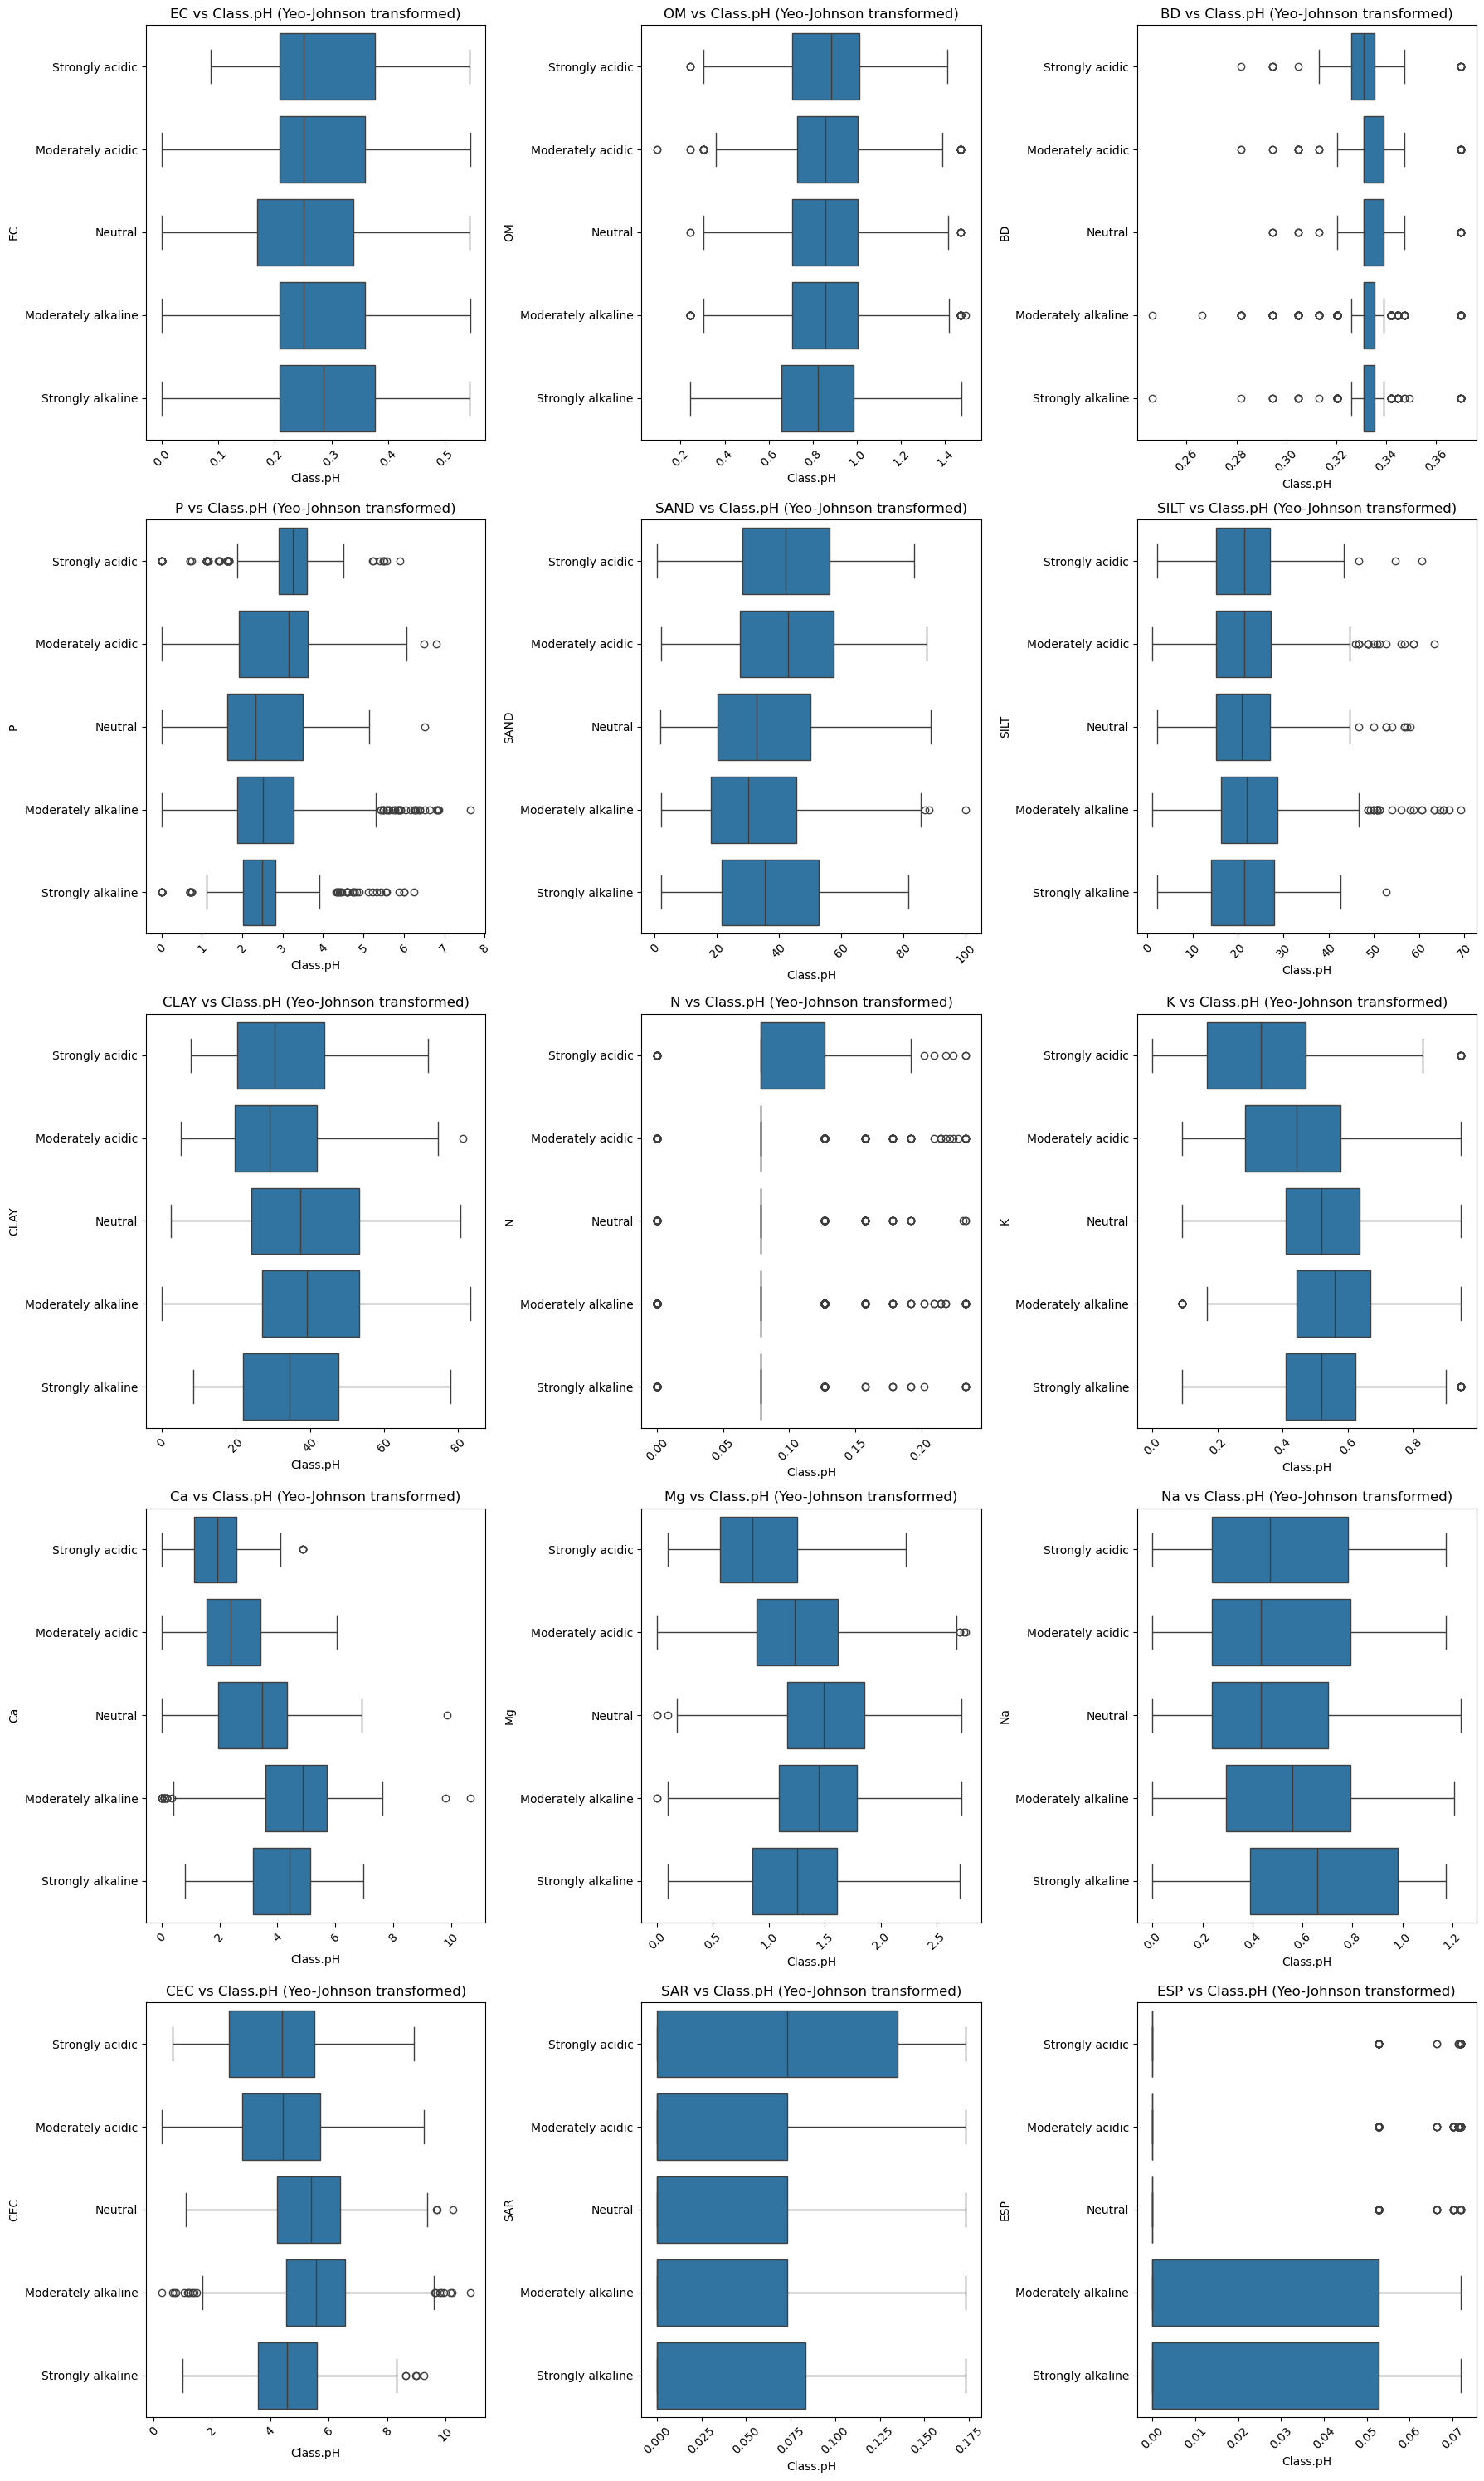

In [13]:
# Boxplot features, 1 box for each target class but still on one subplot
def boxplot_features_vs_target(df, features, title=""):
    target = 'Class.pH'

    # sort the target for consistent ordering
    df[target] = pd.Categorical(df[target], categories=["Strongly acidic", "Moderately acidic", "Neutral", "Moderately alkaline", "Strongly alkaline"], ordered=True)

    ncols = 3
    nrows = (len(features) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 6))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.boxplot(x=col, y=target, data=df, ax=axes[i])
        axes[i].set_title(f"{col} vs {target} ({title})")
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis="x", rotation=45)

    # remove any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

boxplot_features_vs_target(train, numeric_cols, 'raw')
boxplot_features_vs_target(train_yeojohnson, numeric_cols, 'Yeo-Johnson transformed')

In [15]:
# kruskal-wallis test for each feature against the target
from scipy.stats import kruskal

results = []
for col in numeric_cols:
    groups = [group[col].dropna() for name, group in train.groupby('Class.pH')]
    stat, p = kruskal(*groups)
    results.append({'Feature': col, 'H-statistic': stat, 'p-value': p})

kruskal_results = pd.DataFrame(results)
kruskal_results = kruskal_results.sort_values('p-value')
kruskal_results

/tmp/ipykernel_46307/2973368521.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train.groupby('Class.pH')]


,Feature,H-statistic,p-value
9,Ca,968.037492,3.013616e-208
12,CEC,274.549874,3.334232e-58
10,Mg,260.964927,2.825231e-55
8,K,254.736398,6.210855e-54
4,SAND,148.744354,3.782553e-31
6,CLAY,138.748449,5.230832e-29
14,ESP,116.985278,2.351976e-24
3,P,87.033560,5.615989e-18
13,SAR,71.035357,1.372055e-14
11,Na,47.569145,1.160574e-09


In [17]:
# Mutual Information
from sklearn.feature_selection import mutual_info_classif

X = train.dropna().drop(columns=['Class.pH'])
y = train.dropna()['Class.pH']

mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)
mi_results = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_results = mi_results.sort_values('Mutual Information', ascending=False)
mi_results

,Feature,Mutual Information
9,Ca,0.231023
3,P,0.209610
12,CEC,0.078582
8,K,0.077419
11,Na,0.066176
6,CLAY,0.052337
4,SAND,0.051308
14,ESP,0.047603
10,Mg,0.043276
13,SAR,0.031099


## Feature Relevance to Soil pH Classes

This section explores the relationship between soil features and categorical soil pH classes (Strongly acidic, Moderately acidic, Neutral, Moderately alkaline, Strongly alkaline) using boxplots, non-parametric statistical tests, and mutual information.

---

### Distribution Across pH Classes

- **Raw vs. Transformed Values:**
  - Before transformation, many features (e.g., EC, P, Ca, Na) exhibited heavy skewness and extreme outliers within each pH class.
  - After Yeo-Johnson transformation, distributions became more symmetric, allowing clearer comparison between groups.

- **Group Separation:**
  - Nutrient features such as **Ca, Mg, K, Na, CEC** show visible differences in medians across pH groups.  
  - Soil texture variables (**SAND, SILT, CLAY**) vary less dramatically but still demonstrate some shifts with pH categories.
  - Features like **N** and **BD** remain relatively stable across pH classes, indicating weak association.

---

### Kruskal–Wallis Test Results

The Kruskal–Wallis H-test evaluates whether distributions differ significantly across pH classes:

- **Strongest Associations (high H-statistic, very small p-value):**
  - **Ca (H=968.0, p < 1e-208)**
  - **CEC (H=274.5, p < 1e-58)**
  - **Mg (H=260.9, p < 1e-55)**
  - **K (H=254.7, p < 1e-54)**  
  These features show the most statistically significant differences across soil pH groups.

- **Moderate Associations:**
  - **SAND, CLAY, ESP, P** all exhibit significant but weaker differences (p < 1e-18 to 1e-31).

- **Weaker Associations:**
  - **SAR (H=71.0, p ~1e-14)** and **Na (H=47.6, p ~1e-9)** are still significant but contribute less strongly compared to Ca and CEC.

---

### Mutual Information Analysis

Mutual Information (MI) quantifies the dependency between features and soil pH classes:

- **Top Informative Features:**
  - **Ca (MI ≈ 0.23)**  
  - **P (MI ≈ 0.21)**  
  These provide the strongest predictive power for distinguishing pH categories.

- **Moderately Informative Features:**
  - **CEC (0.08), K (0.08), Na (0.07)** contribute useful signal but less than Ca and P.

- **Lower Informative Features:**
  - **CLAY, SAND, ESP, Mg, SAR** have MI values <0.06, suggesting weaker direct predictive relevance.

---

### Integrated Insights

1. **Most Relevant Predictors of Soil pH Classes:**  
   - **Calcium (Ca)** and **Phosphorus (P)** consistently emerge as the strongest predictors, supported by both statistical testing and mutual information.  
   - **CEC, Mg, and K** also provide strong signals.

2. **Supporting but Weaker Predictors:**  
   - **ESP and Na** reflect sodium-driven soil chemistry but are less influential compared to Ca and CEC.  
   - **Texture features (SAND, CLAY)** show significant but weaker association, likely indirect via soil structure and buffering capacity.

3. **Minimal Contribution:**  
   - **N, BD, EC** show little variation across pH classes, implying they do not play a major role in classification.

---

### Summary

- Soil **Ca and P** are the most important determinants of pH classification, with strong statistical evidence and high mutual information.  
- **CEC, Mg, and K** provide secondary but valuable predictive power.  
- **Na, ESP, and SAR** are relevant but less dominant.  
- Soil texture variables and bulk density contribute weakly, and features like **N** and **EC** are largely independent of pH classes.
